In [1]:
#Part 1
#1 Get the total rides, total drivers, and total fares for each
#city type using the groupby() function on the city type using
#the merged DataFrame or separate DataFrames.
#Import modules
# Add magic command
%matplotlib inline
# Add dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#2 Calculate the average fare per ride and the average fare per
#driver by city type.
# Files to load
city_data_csv='Resources/city_data.csv'
ride_data_csv='Resources/ride_data.csv'
# Load data from the file into city dataframe
city_data_csv_df=pd.read_csv(city_data_csv)
city_data_csv_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
# Load data from the file into ride dataframe
ride_data_csv_df=pd.read_csv(ride_data_csv)
ride_data_csv_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [4]:
# Merge the data into one dataframe
pyber_merged_data_df=pd.merge(ride_data_csv_df, city_data_csv_df, how='left', on=['city', 'city'])
pyber_merged_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [5]:
#1 Get the total rides, total drivers, and total fares for each
#city type using the groupby() function on the city type using
#the merged DataFrame or separate DataFrames
total_rides=pyber_merged_data_df.groupby('type')['ride_id'].count()
total_drivers=pyber_merged_data_df.groupby('type')['driver_count'].sum()
total_fares=pyber_merged_data_df.groupby('type')['fare'].sum()
total_rides, total_drivers, total_fares

(type
 Rural        125
 Suburban     625
 Urban       1625
 Name: ride_id, dtype: int64,
 type
 Rural         537
 Suburban     8570
 Urban       59602
 Name: driver_count, dtype: int64,
 type
 Rural        4327.93
 Suburban    19356.33
 Urban       39854.38
 Name: fare, dtype: float64)

In [6]:
#Calculate the average fare per ride and the average fare per
#driver by city type. 
avg_fare_per_ride = total_fares/total_rides 
avg_fare_per_driver = total_fares / total_drivers 
avg_fare_per_ride, avg_fare_per_driver

(type
 Rural       34.623440
 Suburban    30.970128
 Urban       24.525772
 dtype: float64,
 type
 Rural       8.059460
 Suburban    2.258615
 Urban       0.668675
 dtype: float64)

In [7]:
#Create the summary DataFrame with the appropriate columns and
#apply formatting where appropriate.
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Avg Fare Per Ride": avg_fare_per_ride,
    "Avg Fare per Driver": avg_fare_per_driver
})


# Formatting summary dataframe
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map("{:,}".format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Avg Fare Per Ride'] = pyber_summary_df['Avg Fare Per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Avg Fare per Driver'] = pyber_summary_df['Avg Fare per Driver'].map('${:,.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare Per Ride,Avg Fare per Driver
type,,,,,
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


In [8]:
# Delete index
#del pyber_summary_df.index.name

In [9]:
#After merging the DataFrames, do the following:
#1. Rename columns {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}.
pyber_merged_data_df.columns=['City','Date','Fare','Ride ID','No. Drivers','City Type']
pyber_merged_data_df

,City,Date,Fare,Ride ID,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [10]:
#2 Set the index to the Date column.
pyber_merged_data_df.set_index('Date', inplace=True)
pyber_merged_data_df

,City,Fare,Ride ID,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [11]:
#3 Create a new DataFrame for fares and include only the Date, City Type, and Fare columns 
#using the copy()su method on the merged DataFrame.
pyber_merged_data_df_copy=pyber_merged_data_df[['City Type','Fare']].copy()
pyber_merged_data_df_copy

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [12]:
#5 Set the index to the datetime data type.
pyber_merged_data_df_copy.index=pd.to_datetime(pyber_merged_data_df_copy.index)
pyber_merged_data_df_copy.index

DatetimeIndex(['2019-01-14 10:14:22', '2019-03-04 18:24:09',
               '2019-02-24 04:29:00', '2019-02-10 23:22:03',
               '2019-03-06 04:28:35', '2019-03-11 12:26:48',
               '2019-02-27 11:17:56', '2019-04-26 00:43:24',
               '2019-01-08 03:28:48', '2019-03-09 06:26:29',
               ...
               '2019-04-19 04:32:47', '2019-03-18 10:38:05',
               '2019-01-27 18:43:05', '2019-04-29 01:58:44',
               '2019-01-30 10:55:23', '2019-04-29 17:04:39',
               '2019-01-30 00:05:47', '2019-02-10 21:03:50',
               '2019-05-07 19:22:15', '2019-04-25 10:20:13'],
              dtype='datetime64[ns]', name='Date', length=2375, freq=None)

In [13]:
#6 pyber_data_df.set_index(datetime)
pyber_merged_data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [14]:
#7, 8 Calculate the sum() of fares by the type of city and date using groupby() to create a Series.
#pyber_data_df.info()
pyber_merged_data_series_fares = pyber_merged_data_df_copy.groupby(["City Type", "Date"]).sum()
pyber_merged_data_series_fares.head()

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33

In [15]:
#9 Reset the index, which is needed for Step 10.
pyber_merged_data_series_fares.reset_index()
pyber_merged_data_series_fares

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [16]:
# 10. Create a pivot table DataFrame with the Date as the index and columns = 'City Type' with the Fare for each Date in each row. Note: There will be NaNs in some rows, which will be taken care of when you sum based on the date.
pyber_merged_data_series_fares_df_pivot=pd.pivot_table(pyber_merged_data_series_fares, values='Fare', index='Date',
                        columns='City Type', aggfunc=np.sum)
pyber_merged_data_series_fares_df_pivot

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [17]:
#11. Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc .
pyber_data_series_fares_sum_df_pivot_loc = pyber_merged_data_series_fares_df_pivot.loc['2019-01-01':'2019-04-28']
pyber_data_series_fares_sum_df_pivot_loc

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [18]:
#12 Create a new DataFrame by setting the DataFrame you created in Step 11 with resample()
#in weekly bins, and calculate the sum() of the fares for each week.
fares_sum_resample_df=pyber_data_series_fares_sum_df_pivot_loc.resample('w').sum()
fares_sum_resample_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [19]:
# Dataframe index reset
fares_sum_resample_df.reset_index(0, inplace=True)
fares_sum_resample_df

City Type,Date,Rural,Suburban,Urban
0,2019-01-06,187.92,721.60,1661.68
1,2019-01-13,67.65,1105.13,2050.43
2,2019-01-20,306.00,1218.20,1939.02
3,2019-01-27,179.69,1203.28,2129.51
4,2019-02-03,333.08,1042.79,2086.94
5,2019-02-10,115.80,974.34,2162.64
6,2019-02-17,95.82,1045.50,2235.07
7,2019-02-24,419.06,1412.74,2466.29
8,2019-03-03,175.14,858.46,2218.20
9,2019-03-10,303.94,925.27,2470.93


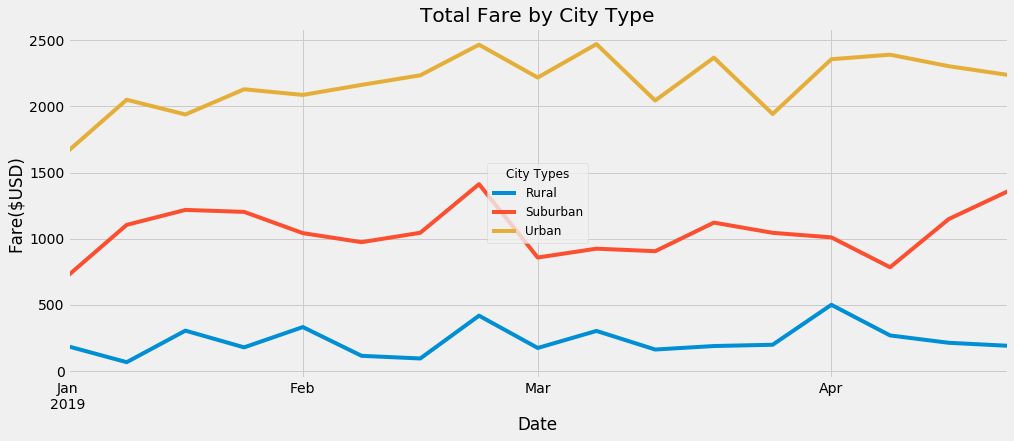

In [20]:
#13 Using the object-oriented interface method, plot the DataFrame you
#created in Step 12 using the df.plot() function. Things to consider with
#your plotting:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,6))
ax.set_title('Total Fare by City Type')
fares_sum_resample_df.plot.line(x='Date', y='Rural',ax=ax )
fares_sum_resample_df.plot.line(x='Date', y='Suburban', ax=ax)
fares_sum_resample_df.plot.line(x='Date', y='Urban', ax=ax)

# Create labels for the x and y axes.
ax.set_xlabel("Date")
ax.set_ylabel("Fare($USD)")

#Add the legend.
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Save the figure.
plt.savefig("analysis/Fig9.png")
# Show the plot
plt.show()